> #                                Data Analytics Final Project - KGF Airlines


* **Team Members** - Karishma Parasa, Hiralben Utsav
* **Presentation Date** - 21st Apr 2022

In [1]:
## Import Mandatory Packages ##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
import altair as alt

##  Import and display the dataset along with dataset information

In [8]:

## Import file ##

Airline_Dataset = pd.read_excel(r'C:\Users\hp\Downloads\Final Data.xlsx')

## Trim the column headings to remove unwanted spaces ##
Airline_Dataset.columns = Airline_Dataset.columns.str.strip()

print("Shape of data is :",Airline_Dataset.shape)
Airline_Dataset.info()


Shape of data is : (25976, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Airline Name                       25976 non-null  object 
 1   Year                               25976 non-null  int64  
 2   Port Country                       25976 non-null  object 
 3   Flight Id                          25976 non-null  int64  
 4   Male Passengers                    25976 non-null  int64  
 5   Female Passengers                  25976 non-null  int64  
 6   Economy Class                      25976 non-null  int64  
 7   Business Class                     25976 non-null  int64  
 8   Economy Plus Class                 25976 non-null  int64  
 9   Flight Distance(Miles)             25976 non-null  int64  
 10  Inflight wifi service              25976 non-null  int64  
 11  Departure/Arrival time 

In [9]:
Airline_Dataset.head(5)

,Airline Name,Year,Port Country,Flight Id,Male Passengers,Female Passengers,Economy Class,Business Class,Economy Plus Class,Flight Distance(Miles),...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Overall Rating,Operating Cost(In Dollars),Revenue(In Dollars)
0,Air Caledonie,2020,New Caledonia,19556,163,37,113,10,77,160,...,5,5,2,5,5,50,44.0,Satisfied,18880,27376.000000
1,Air China,2020,China,90035,126,274,280,23,97,2863,...,4,4,3,4,5,0,0.0,Neutral,337834,489859.300000
2,Air India,2022,India,12360,103,97,130,1,69,192,...,1,3,2,2,2,0,0.0,Dissatisfied,22656,12586.666667
3,Air India,2016,Singapore,77959,73,327,295,26,79,3377,...,1,1,3,1,4,0,6.0,Dissatisfied,398486,221381.111111
4,Air Nauru,2011,Nauru,36875,172,128,209,24,67,1182,...,2,2,4,2,4,0,20.0,Neutral,139476,77486.666667


# Data Analysis

**1. Display how many Airline Industries are operating their service worldwide in last decade**

In [36]:
Total_Airlines = Airline_Dataset['Airline Name'].unique()
print('Total Airlines:', Total_Airlines)

Total Airlines: ['Air Caledonie' 'Air China' 'Air India' 'Air Nauru' 'Air New Zealand'
 'Air Niugini' 'Air Pacific' 'Air Vanuatu' 'Alitalia' 'British Airways'
 'Canadian Airlines Intl' 'Cathay Pacific Airways' 'Continental Airlines'
 'Flying Tiger Line' 'Garuda Indonesia' 'Japan Airlines'
 'KLM Royal Dutch Airlines' 'Lufthansa German Airlines'
 'Malaysia Airlines' 'Olympic Airways' 'Pan American'
 'Philippine Airlines' 'Polynesian Airlines' 'Qantas Airways'
 'Royal Brunei Airlines' 'Singapore Airlines' 'South African Airways'
 'Thai Airways International' 'Union de Transports Aeriens'
 'Yugoslav Airlines' 'United Airlines' 'Merpati Nusantara Airlines'
 'Cook Islands International' 'All Nippon Airways' 'Hawaiian Airlines'
 'Solomon Airlines' 'Lauda Air' 'Aerolineas Argentinas'
 'Federal Express Corporation' 'American Airlines' 'Korean Air' 'Gulf Air'
 'Northwest Airlines' 'Pel-Air Aviation' 'Australia Asia Airlines'
 'Mandarin Airlines' 'SriLankan Airlines' 'Air France'
 'Aeroflot Russi

In [41]:
Total_Airlines_Num = len(Airline_Dataset['Airline Name'].unique())
print('Total Number of Airlines:', Total_Airlines_Num)

Total Number of Airlines: 99


**2. Which Airline Covered Maximum Flight Distance**

In [45]:
Flightdistance = Airline_Dataset.groupby('Airline Name')['Flight Distance(Miles)'].sum().reset_index(name='sum')

Flightdistance.loc[(Flightdistance['sum']==Flightdistance['sum'].max())]  

,Airline Name,sum
78,Qantas Airways,6963391


**3. Display the top 10 Airlines average flight disctance using a bar graph**

In [72]:
SortFlightDistance = Flightdistance.sort_values('sum',ascending=False)
Top_10 = SortFlightDistance.iloc[:10]
print(Top_10)

                   Airline Name      sum
78               Qantas Airways  6963391
28              British Airways  1408366
60    Lufthansa German Airlines   905296
11              Air New Zealand   902261
77          Polynesian Airlines   727237
87   Thai Airways International   599204
55     KLM Royal Dutch Airlines   583422
29       Canadian Airlines Intl   577248
90  Union de Transports Aeriens   568384
22         Ansett International   568325


<AxesSubplot:xlabel='Airline Name'>

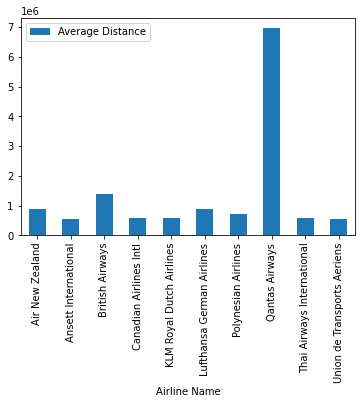

In [94]:
Top_10.groupby('Airline Name')['sum'].mean().reset_index(name = 'Average Distance').plot(x = 'Airline Name', kind = 'bar')

**4. Which Airline Covered Minimum Flight Distance**

In [74]:
Flightdistance.loc[(Flightdistance['sum']==Flightdistance['sum'].min())]  

,Airline Name,sum
72,Pacific Air Express,4678


**5. Display the top 10 Airlines average flight disctance using a bar graph**

In [75]:
SortFlightDistanceMin = Flightdistance.sort_values('sum')
Last_10 = SortFlightDistanceMin.iloc[:10]
print(Last_10)

            Airline Name    sum
72   Pacific Air Express   4678
74      Pel-Air Aviation   7424
41        Etihad Airways   7632
69   Norfolk Jet Express   9651
67     National Airlines   9840
45  Flight West Airlines  14889
17          Airlines PNG  15011
61           MBA Pty Ltd  16124
93               Valuair  16418
86              Swissair  16879


<AxesSubplot:xlabel='Airline Name'>

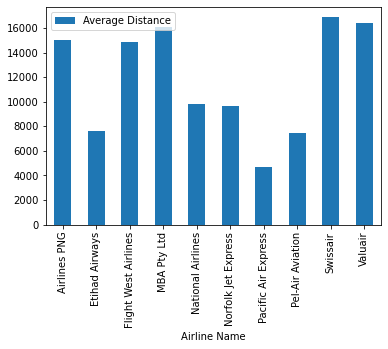

In [83]:
Last_10.groupby('Airline Name')['sum'].mean().reset_index(name = 'Average Distance').plot(x = 'Airline Name', kind = 'bar')

**6. Which Airlines scheuled lowest number of flights in the last decade**

In [110]:
Lowest_Flights = Airline_Dataset.groupby('Airline Name')['Flight Id'].count().reset_index(name='count')

Lowest_Flights.loc[(Lowest_Flights['count']==Lowest_Flights['count'].min())]  

,Airline Name,count
41,Etihad Airways,4


**7. Which Airlines scheuled highest number of flights in the last decade**

In [111]:
Highest_Flights = Airline_Dataset.groupby('Airline Name')['Flight Id'].count().reset_index(name='count')

Highest_Flights.loc[(Highest_Flights['count']==Highest_Flights['count'].max())] 

,Airline Name,count
78,Qantas Airways,5901


**8. Which Airlines is preferred by the lowest number of passengers**

In [113]:
#Total Number of Passengers travelled in whole last decade

Total_Passengers= Airline_Dataset['Male Passengers'].sum() + Airline_Dataset['Female Passengers'].sum()
print("Total Number of Passengers Travelled: ", Total_Passengers)

Total Number of Passengers Travelled:  7356100


In [127]:
Total_Passengers_Min = Airline_Dataset.groupby('Airline Name')['Male Passengers'].sum().reset_index(name='sum') + Airline_Dataset.groupby('Airline Name')['Female Passengers'].sum().reset_index(name='sum')

Total_Passengers_Min[(Total_Passengers_Min['sum']==Total_Passengers_Min['sum'].min())] 


,Airline Name,sum
41,Etihad AirwaysEtihad Airways,1400


**9. Which Airlines is preferred by the highest number of passengers**

In [122]:
Total_Passengers_Max = Airline_Dataset.groupby('Airline Name')['Male Passengers'].sum().reset_index(name='sum') + Airline_Dataset.groupby('Airline Name')['Female Passengers'].sum().reset_index(name='sum')

Total_Passengers_Max[(Total_Passengers_Max['sum']==Total_Passengers_Max['sum'].max())] 

,Airline Name,sum
78,Qantas AirwaysQantas Airways,1664300


**10. Display the Top 5 Airlines with Highest Operating Cost(In Millions)**

In [149]:
O = (Airline_Dataset.groupby('Airline Name')['Operating Cost(In Dollars)'].sum()/1000000).reset_index(name='Total Operating cost in Millions')
O

,Airline Name,Total Operating cost in Millions
0,AOM French Airlines,25.618272
1,Aeroflot Russian Intl A/l,4.656162
2,Aerolineas Argentinas,54.968530
3,Air Andorra Nui,4.755872
4,Air Caledonie,36.997012
...,...,...
94,Vietnam Airlines,17.775756
95,Virgin Atlantic Airways,19.205208
96,Virgin Australia,16.181930
97,Virgin Samoa,12.074586


In [148]:
Operating_cost = O.sort_values(by="Total Operating cost in Millions",ascending=False)
Operating_cost.head(5)

,Airline Name,Total Operating cost in Millions
78,Qantas Airways,821.680138
28,British Airways,166.187188
60,Lufthansa German Airlines,106.824928
11,Air New Zealand,106.466798
77,Polynesian Airlines,85.813966


**11. Display the Top 5 Airlines with Highest Revenue(In Millions)**

In [154]:
R = (Airline_Dataset.groupby('Airline Name')['Revenue(In Dollars)'].sum()/1000000).reset_index(name='Total Revenue in Millions')
R

,Airline Name,Total Revenue in Millions
0,AOM French Airlines,29.764927
1,Aeroflot Russian Intl A/l,6.134422
2,Aerolineas Argentinas,63.935606
3,Air Andorra Nui,5.501139
4,Air Caledonie,43.054599
...,...,...
94,Vietnam Airlines,19.583398
95,Virgin Atlantic Airways,21.245536
96,Virgin Australia,18.148158
97,Virgin Samoa,12.946730


In [155]:
Revenue = R.sort_values(by="Total Revenue in Millions",ascending=False)
Revenue.head(5)

,Airline Name,Total Revenue in Millions
78,Qantas Airways,950.192419
28,British Airways,192.047456
11,Air New Zealand,124.933123
60,Lufthansa German Airlines,124.596552
77,Polynesian Airlines,98.739994


**12. Display the Top 5 Airlines with Highest Profit(In Millions)**

(Profit = Revenue - Operating Cost)

In [234]:
#Profit = Airline_Dataset['Revenue(In Dollars)'] - Airline_Dataset['Operating Cost(In Dollars)']
#rofit

p1 = Airline_Dataset.groupby('Airline Name')['Revenue(In Dollars)'].sum().reset_index(name='sum') 
p1

p2 = Airline_Dataset.groupby('Airline Name')['Operating Cost(In Dollars)'].sum().reset_index(name='sum') 
p2


,Airline Name,sum
0,AOM French Airlines,25618272
1,Aeroflot Russian Intl A/l,4656162
2,Aerolineas Argentinas,54968530
3,Air Andorra Nui,4755872
4,Air Caledonie,36997012
...,...,...
94,Vietnam Airlines,17775756
95,Virgin Atlantic Airways,19205208
96,Virgin Australia,16181930
97,Virgin Samoa,12074586


**13. Display the Percentage of Male Passengers**

In [159]:
MalePassengerPercent = "{:.2%}".format(Airline_Dataset['Male Passengers'].sum()/(Airline_Dataset['Male Passengers'].sum()+Airline_Dataset['Female Passengers'].sum()))
print("Male Passenger Percentage: " , MalePassengerPercent)

Male Passenger Percentage:  39.68%


**14. Display the Percentage of Female Passengers**

In [161]:
FemalePassengerPercent = "{:.2%}".format(Airline_Dataset['Female Passengers'].sum()/(Airline_Dataset['Male Passengers'].sum()+Airline_Dataset['Female Passengers'].sum()))
print("Female Passenger Percentage: " , FemalePassengerPercent)

Female Passenger Percentage:  60.32%


**15. Display the count of passengers who preferred Economy Class(In Lakhs)**

In [172]:
Eco = Airline_Dataset['Economy Class'].sum()/100000
print("Number of Passengers who preferred Economy Class: " , Eco)

Number of Passengers who preferred Economy Class:  49.24449


**16. Display the count of passengers who preferred EconomyPlus Class(In Lakhs)**

In [168]:
EcoPlus = Airline_Dataset['Economy Plus Class'].sum()/100000
print("Number of Passengers who preferred Economy Plus Class: " , EcoPlus)

Number of Passengers who preferred Economy Plus Class:  19.99318


**17. Display the count of passengers who preferred Business Class(In Lakhs)**

In [174]:
Business = Airline_Dataset['Business Class'].sum()/100000
print("Number of Passengers who preferred Business Class: " , Business)

Number of Passengers who preferred Business Class:  4.32333


**18. What are the parameters considered for Customer Rating**

In [197]:
Clmns = Airline_Dataset.columns
print("Parameters Considered for Customer Rating:")
print(Clmns[10],"\n",
Clmns[11],"\n",
Clmns[12],"\n",
Clmns[13],"\n",
Clmns[14],"\n",
Clmns[15],"\n",
Clmns[16],"\n",
Clmns[17],"\n",
Clmns[18],"\n",
Clmns[19],"\n",
Clmns[20],"\n",
Clmns[21],"\n",
Clmns[22],"\n",
Clmns[23])


Parameters Considered for Customer Rating:
Inflight wifi service 
 Departure/Arrival time convenient 
 Ease of Online booking 
 Gate location 
 Food and drink 
 Online boarding 
 Seat comfort 
 Inflight entertainment 
 On-board service 
 Leg room service 
 Baggage handling 
 Checkin service 
 Inflight service 
 Cleanliness


**19. Display Graph for Operating Cost and Revenue by Year**

In [13]:
A1 = Airline_Dataset.groupby('Year')['Operating Cost(In Dollars)'].sum().reset_index(name='op')
A2= Airline_Dataset.groupby('Year')['Revenue(In Dollars)'].sum().reset_index(name='re')

In [14]:
pd.options.display.float_format = '{:.0f}'.format
A2

,Year,re
0,2011,347726278
1,2012,361261685
2,2013,341659209
3,2014,334557749
4,2015,365513356
5,2016,372399161
6,2017,373574237
7,2018,342736782
8,2019,348605135
9,2020,349937539


In [15]:
New=pd.merge(A1,A2,how="inner")
New

,Year,op,re
0,2011,298333146,347726278
1,2012,316452046,361261685
2,2013,292179210,341659209
3,2014,289384970,334557749
4,2015,313048218,365513356
5,2016,323092614,372399161
6,2017,318233964,373574237
7,2018,301612602,342736782
8,2019,305426598,348605135
9,2020,304496286,349937539


In [17]:
chart = alt.Chart(New).mark_line().encode(x='Year')
line_A = chart.mark_line(color='#5276A7').encode(y='op')
line_B = chart.mark_line(color='#F18727').encode(y='re')
alt.layer(line_A, line_B).resolve_scale(y='independent')

alt.LayerChart(...)

**20. Display number of male and female passengers year wise using Graph**

In [11]:
X1 = Airline_Dataset.groupby('Year')['Male Passengers'].sum().reset_index(name='male')
X2 = Airline_Dataset.groupby('Year')['Female Passengers'].sum().reset_index(name='female')
New1 =pd.merge(X1,X2,how="inner")
New1

,Year,male,female
0,2011,240167,364133
1,2012,244751,377749
2,2013,230896,353604
3,2014,240216,354484
4,2015,243240,380860
5,2016,252847,386253
6,2017,248578,385422
7,2018,242550,364350
8,2019,245634,364366
9,2020,243304,372196


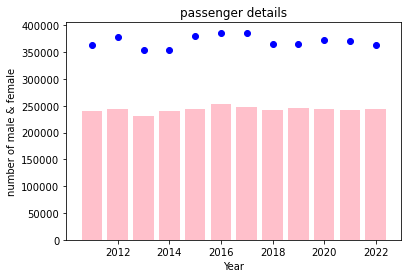

In [12]:
plt.bar(X1['Year'] ,X1['male'] , color='pink')
plt.scatter(X2['Year'] ,X2['female'] , color='blue')
plt.xlabel('Year')
plt.ylabel('number of male & female')
plt.title('passenger details')
plt.show()